In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
city_csv = "C:\\Users\\tt66\\GWDC201805DATA3-Class-Repository-DATA\\Homework\\05-Matplotlib\\Instructions\\Pyber\\data\\city_data.csv"
city_data = pd.read_csv(city_csv)
ride_csv = "C:\\Users\\tt66\\GWDC201805DATA3-Class-Repository-DATA\\Homework\\05-Matplotlib\\Instructions\\Pyber\data\\ride_data.csv"
ride_data = pd.read_csv(ride_csv)
uber_merge_data = pd.merge(city_data, ride_data, on="city", how="outer")
uber_merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
urban_cities = uber_merge_data[uber_merge_data["type"] == "Urban"]
sub_cities = uber_merge_data[uber_merge_data["type"] == "Suburban"]
rural_cities = uber_merge_data[uber_merge_data["type"] == "Rural"]

In [5]:
urban_total_drivers = urban_cities.loc[:, ["city", "driver_count"]]
urban_total_drivers.head()

,city,driver_count
0,Richardfort,38
1,Richardfort,38
2,Richardfort,38
3,Richardfort,38
4,Richardfort,38


In [6]:
urban_drivers_group = urban_cities.groupby(["city"])
urban_drivers_count = urban_drivers_group["driver_count"].mean()
urban_drivers_count.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [7]:
len(urban_drivers_count)

66

In [8]:
urban_drivers_sum = urban_drivers_count.sum()
urban_drivers_sum

2405

In [9]:
sub_drivers_group = sub_cities.groupby(["city"])
sub_drivers_count = sub_drivers_group["driver_count"].mean()
rural_drivers_group = rural_cities.groupby(["city"])
rural_drivers_count = rural_drivers_group["driver_count"].mean() 

In [10]:
sub_drivers_sum = sub_drivers_count.sum()
rural_drivers_sum = rural_drivers_count.sum()

In [11]:
urban_rides_group = urban_cities.groupby(["city"])
urban_rides_count = urban_rides_group["ride_id"].count()
urban_rides_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [12]:
len(urban_rides_count)

66

In [13]:
sub_rides_group = sub_cities.groupby(["city"])
sub_rides_count = sub_rides_group["ride_id"].count()
sub_rides_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [14]:
rural_rides_group = rural_cities.groupby(["city"])
rural_rides_count = rural_rides_group["ride_id"].count()
rural_rides_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [41]:
urban_rides_sum = urban_rides_count.sum()
sub_rides_sum = sub_rides_count.sum()
rural_rides_sum = rural_rides_count.sum()

In [30]:
urban_cities_fare_group = urban_cities.groupby(["city"])
urban_cities_fare = round(pd.DataFrame(urban_cities_fare_group["fare"].mean()),0)
urban_cities_fare.head()

,fare
city,
Amandaburgh,25.0
Barajasview,25.0
Carriemouth,28.0
Christopherfurt,25.0
Deanville,26.0


In [52]:
#average fare
sub_cities_fare_group = sub_cities.groupby(["city"])
sub_cities_fare = round(pd.DataFrame(sub_cities_fare_group["fare"].mean()),0)
rural_cities_fare_group = rural_cities.groupby(["city"])
rural_cities_fare = round(pd.DataFrame(rural_cities_fare_group["fare"].mean()),0)

In [79]:
urban_fare_sum = urban_cities_fare.sum()
sub_fare_sum = sub_cities_fare.sum()
rural_fare_sum = rural_cities_fare.sum()

<IPython.core.display.Javascript object>


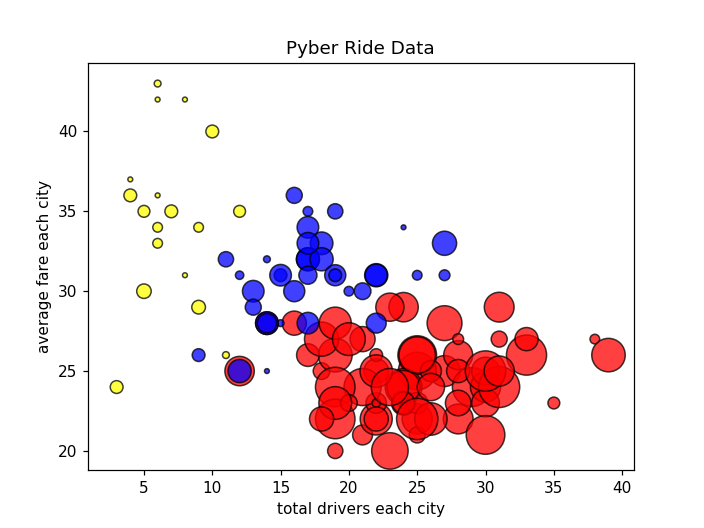

In [55]:
plt.scatter(urban_rides_count, urban_cities_fare, facecolor="red", marker="o", edgecolors="black",
            s=urban_drivers_count *10, alpha=0.75)
plt.scatter(sub_rides_count, sub_cities_fare, facecolor="blue", marker="o", edgecolors="black",
            s=sub_drivers_count*10, alpha=0.75)
plt.scatter(rural_rides_count, rural_cities_fare, facecolor="yellow", marker="o", edgecolors="black",
            s=rural_drivers_count*10, alpha=0.75)

plt.title("Pyber Ride Data")
plt.xlabel("total drivers each city")
plt.ylabel("average fare each city")
plt.savefig("Pyber Ride Data.png")


<IPython.core.display.Javascript object>


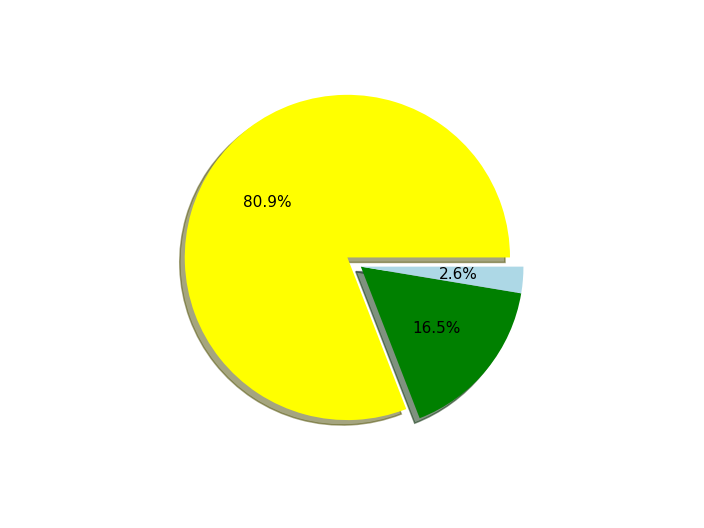

In [82]:
drivers = [urban_drivers_sum, sub_drivers_sum, rural_drivers_sum]
explode = (0.1,0,0)
colors = ["yellow","green","lightblue"]
plt.axis("equal")
plt.pie(drivers, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=360)
plt.savefig("Pyber Ride Data.png")

<IPython.core.display.Javascript object>


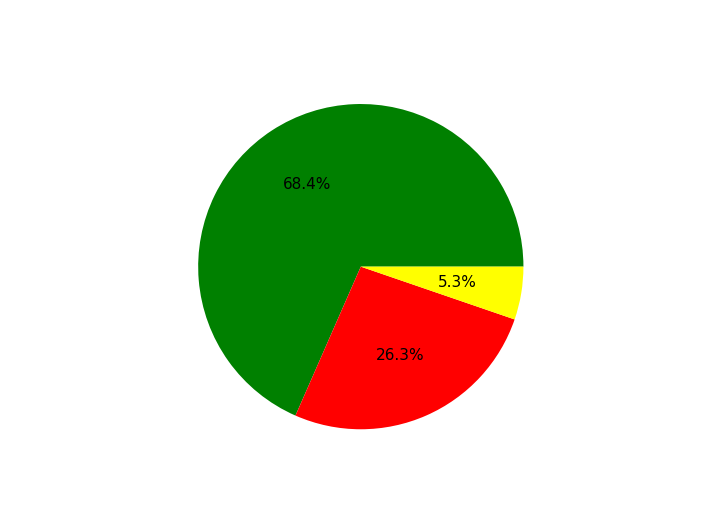

In [83]:
riders = [urban_rides_sum, sub_rides_sum, rural_rides_sum]
explode = (0,0,0)
colors = ["green","red","yellow"]
plt.axis("equal")
plt.pie(riders, explode=explode, colors=colors, autopct="%1.1f%%", shadow=False, startangle=360)
plt.savefig("Pyber Ride Data.png")

<IPython.core.display.Javascript object>


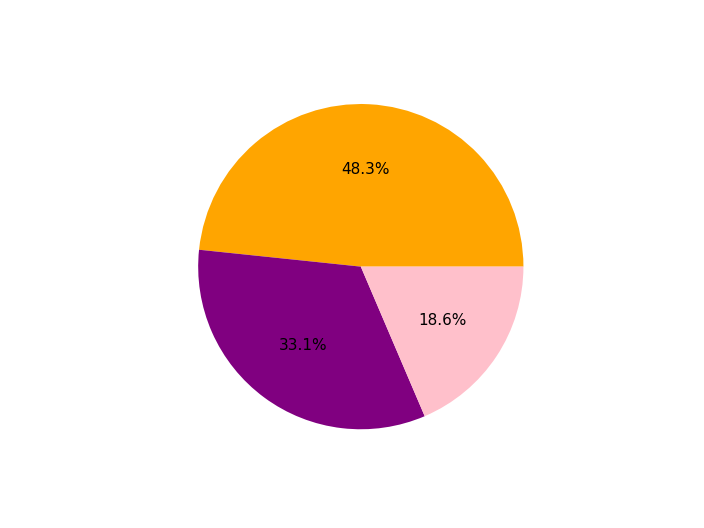

In [84]:
fares = [urban_fare_sum, sub_fare_sum, rural_fare_sum]
explode = (0,0,0)
colors = ["orange","purple","pink"]
plt.axis("equal")
plt.pie(fares, explode=explode, colors=colors, autopct="%1.1f%%", shadow=False, startangle=360)
plt.savefig("Pyber Ride Data.png")